<a href="https://colab.research.google.com/github/SuhyeonHa/MatrixComputation/blob/master/Assignment05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic regression for a binary classification

#### 1. Training Data

- load the training data file ('data.txt')
- each row $\{ (x^{(i)}, y^{(i)}, l^{(i)}) \}$ of the data consists of a 2-dimensional point $(x, y)$ with its label $l$
- $x, y \in \mathbb{R}$ and $l \in \{0, 1\}$

#### 2. Logistic regression

- $\hat{h} = \sigma(z)$ 
- $z = \theta_0 + \theta_1 x + \theta_2 y$, where $\theta_0, \theta_1, \theta_2 \in \mathbb{R}$
- $\sigma(z) = \frac{1}{1 + \exp(-z)}$
- $\sigma^{\prime}(z) = \sigma(z) (1 - \sigma(z))$

#### 3. Objective Function

- $J(\theta_0, \theta_1, \theta_2) = \frac{1}{m} \sum_{i=1}^m ( - l^{(i)} \log(\sigma(z^{(i)})) - (1 - l^{(i)}) \log(1 - \sigma(z^{(i)}))  )$

#### 4. Gradient Descent

- $\theta_0^{(t+1)} := \theta_0^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (\sigma(z^{(i)}) - l^{(i)})$
- $\theta_1^{(t+1)} := \theta_1^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (\sigma(z^{(i)}) - l^{(i)}) x^{(i)}$
- $\theta_2^{(t+1)} := \theta_2^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (\sigma(z^{(i)}) - l^{(i)}) y^{(i)}$
- you should choose a learning rate $\alpha$ in such a way that the convergence is achieved
- you can use any initial conditions $(\theta_0^{(0)}, \theta_1^{(0)}, \theta_2^{(0)})$
 
#### 5. Training

- find optimal parameters $(\theta_0, \theta_1, \theta_2)$ using the training data

#### 6. Visualize Classifier

- visualize the obtained classifier with varying $x$ and $y$ values that range from the minimum to the maximum of the training data




## Maching Learning Lecture
 ~ 4

https://www.youtube.com/playlist?list=PLLssT5z_DsK-h9vYZkQkYNWcItqhlRJLN

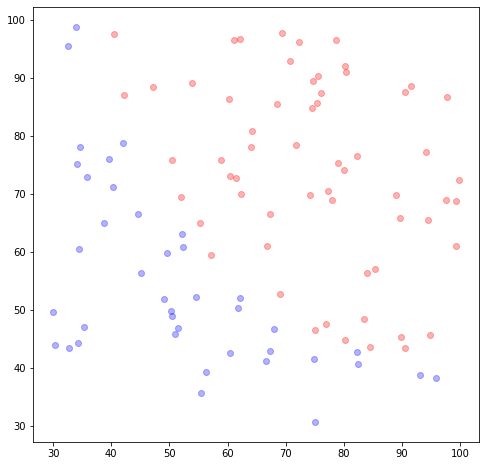

In [2]:
import numpy as np
from matplotlib import pyplot as plt

data_path = '/content/drive/My Drive/Colab Notebooks/MatrixComputation/data.txt'
data    = np.genfromtxt(data_path, delimiter=',')

x       = data[:, 0]
y       = data[:, 1]
label   = data[:, 2]

x_label0    = x[label == 0]
x_label1    = x[label == 1]

y_label0    = y[label == 0]
y_label1    = y[label == 1]

plt.figure(figsize=(8, 8))
plt.scatter(x_label0, y_label0, alpha=0.3, c='b')
plt.scatter(x_label1, y_label1, alpha=0.3, c='r')
plt.show()

In [19]:
SIZE_DATA = len(x)
print(f'SIZE_DATAL {SIZE_DATA}')
print(f'x.shape {x.shape}')
print(f'y.shape {y.shape}')
print(f'label.shape {label.shape}')

SIZE_DATAL 100
x.shape (100,)
y.shape (100,)
label.shape (100,)


In [0]:
def pred_sigma(z):
  temp = 1 + np.exp(-z)
  return 1/temp

In [0]:
def pred_z(theta0, theta1, theta2, x, y):
  return theta0 + theta1*x + theta2*y

In [0]:
def objFunc(sigma, label, num):
  term1 = -label*np.log(sigma)
  term2 = (1-label)*np.log(1-sigma)
  result = np.sum(term1-term2)
  return result/num

In [0]:
# linear regression #

In [0]:
# hyper parameters #
theta0 = 0 # parameter initilization
theta1 = 0
theta2 = 0
itr = 100 # step_size
lr = 1e-4 # learning_rate

cost_list = []
theta0_list = []
theta1_list = []
theta2_list = []

In [75]:
for i in range(itr): # gradient descent
  z = pred_z(theta0, theta1, theta2, x, y)
  sigma = pred_sigma(z)
  cost_prev = objFunc(sigma, label, SIZE_DATA) 
  # print(cost_prev)

  cost_list.append(cost_prev)
  theta0_list.append(theta0)
  theta1_list.append(theta1)
  theta2_list.append(theta2) 

  grad_zero = np.sum(sigma - label) / SIZE_DATA
  grad_one = np.sum((sigma - label)*x) / SIZE_DATA
  grad_two = np.sum((sigma - label)*y) / SIZE_DATA

  temp0 = theta0 - lr*grad_zero
  temp1 = theta1 - lr*grad_one
  temp2 = theta2 - lr*grad_two

  z = pred_z(temp0, temp1, temp2, x, y)
  sigma = pred_sigma(z)
  cost_next = objFunc(sigma, label, SIZE_DATA)
  # print(cost_next)

  if(cost_prev < cost_next): # repeat until convergence cost_prev < cost_next
    break
  else:
    theta0 = temp0
    theta1 = temp1
    theta2 = temp2

final_step = i
print(f'final_step {final_step}')
print(f'final_cost {cost_prev}')
# print(f'cost {cost_list}')
# print(f'theta0 {theta0_list}')
# print(f'theta1 {theta1_list}')

final_step 99
final_cost 0.6301784181708053


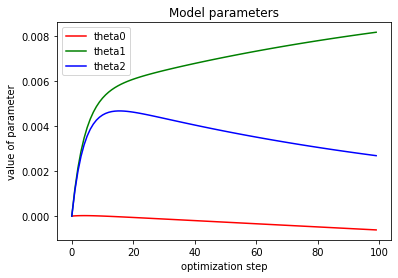

In [77]:
plt.plot(range(final_step+1), theta0_list, c='r')
plt.plot(range(final_step+1), theta1_list, c='g')
plt.plot(range(final_step+1), theta2_list, c='b')
plt.xlabel('optimization step')
plt.ylabel('value of parameter')
plt.title('Model parameters')
plt.legend(['theta0', 'theta1', 'theta2'])
plt.show()

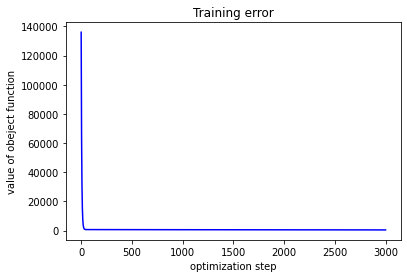

In [0]:
plt.plot(range(final_step+1), cost_list, c='b')
plt.xlabel('optimization step')
plt.ylabel('value of obeject function')
plt.title('Training error')
plt.show()

In [0]:
test_cost_list = []
for i in range(final_step+1): # test error
  temp0 = theta0_list[i]
  temp1 = theta1_list[i]
  temp2 = theta2_list[i]
  temp3 = theta3_list[i]

  h_hat_test = pred(x_test, y_test, z_test, temp0, temp1, temp2, temp3)
  cost = ObjFnc(num_test, h_test, h_hat_test)
  test_cost_list.append(cost)

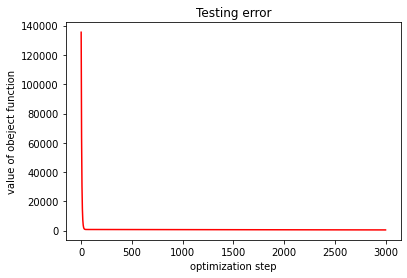

In [0]:
plt.plot(range(final_step+1), test_cost_list, c='r')
plt.xlabel('optimization step')
plt.ylabel('value of obeject function')
plt.title('Testing error')
plt.show()